In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('./data/diabetes_prediction_dataset.csv')
y = data['diabetes']
X = data.drop('diabetes', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=42, shuffle=True)
train = pd.concat(objs=[X_train, y_train], axis=1)
train_positive = train[train['diabetes'] == 1]
train_negative = train[train['diabetes'] == 0]

In [65]:
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

<Axes: title={'center': 'Age histogram'}, ylabel='Frequency'>

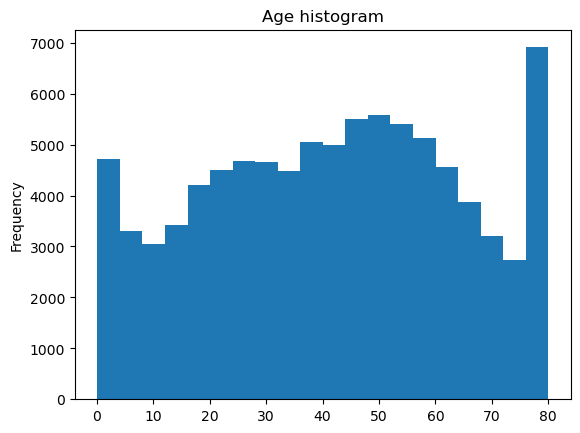

In [66]:
import matplotlib.pyplot as plt

age = X_train['age']
age.plot.hist(bins=20, title="Age histogram")

In [67]:
age.describe()

count    90000.000000
mean        41.929480
std         22.509253
min          0.080000
25%         24.000000
50%         43.000000
75%         60.000000
max         80.000000
Name: age, dtype: float64

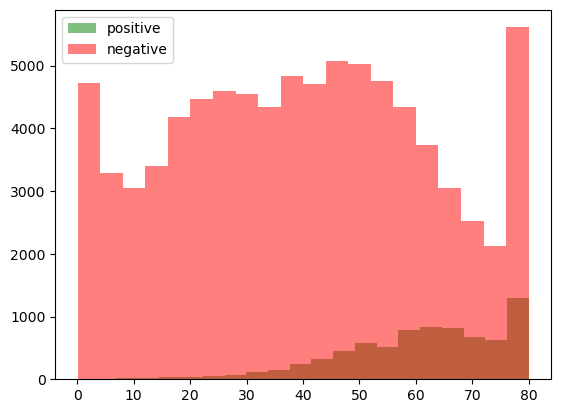

In [68]:
age_diabetes_all = pd.concat(objs=[age, y_train], axis=1)
age_positive = age_diabetes_all[age_diabetes_all['diabetes'] == 1]['age']
age_negative = age_diabetes_all[age_diabetes_all['diabetes'] == 0]['age']
plt.hist(age_positive, bins=20, color='green', alpha=0.5, label='positive')
plt.hist(age_negative, bins=20, color='red', alpha=0.5, label='negative')
plt.legend()
plt.show()

6.6    7665
5.7    7556
6.5    7525
5.8    7488
6.0    7469
6.2    7407
6.1    7254
3.5    6889
4.8    6865
4.5    6831
4.0    6789
5.0    6764
8.2     598
9.0     594
8.8     590
7.0     572
6.8     572
7.5     572
Name: HbA1c_level, dtype: int64

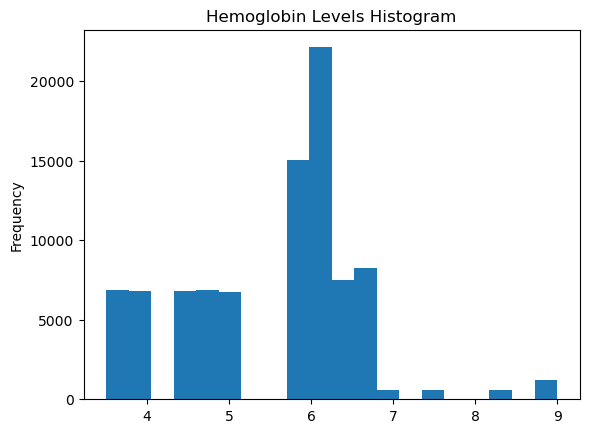

In [69]:
hm_level_key = 'HbA1c_level'
hm_level = X_train[hm_level_key]
hm_level.plot.hist(bins=20, title="Hemoglobin Levels Histogram")
hm_level.value_counts()

In [70]:
hm_level.describe()

count    90000.000000
mean         5.526579
std          1.070521
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: HbA1c_level, dtype: float64

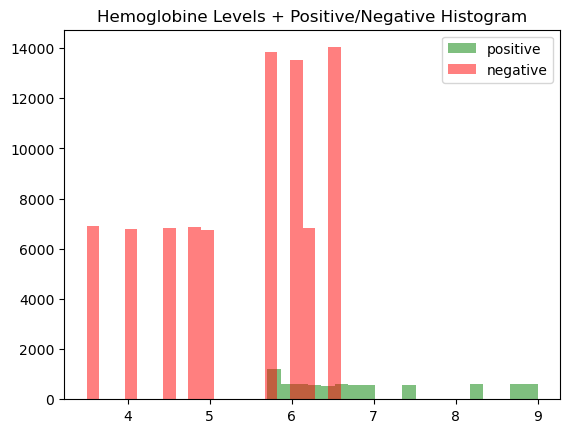

In [71]:
hm_level_all = pd.concat(objs=[hm_level, y_train], axis=1)
hm_positive = hm_level_all[hm_level_all['diabetes'] == 1][hm_level_key]
hm_negative = hm_level_all[hm_level_all['diabetes'] == 0][hm_level_key]
plt.hist(hm_positive, bins=20, color='green', alpha=0.5, label='positive')
plt.hist(hm_negative, bins=20, color='red', alpha=0.5, label='negative')
plt.title('Hemoglobine Levels + Positive/Negative Histogram')
plt.legend()
plt.show()

<Axes: title={'center': 'Avg HM Level Per Age Group'}, xlabel='age_group'>

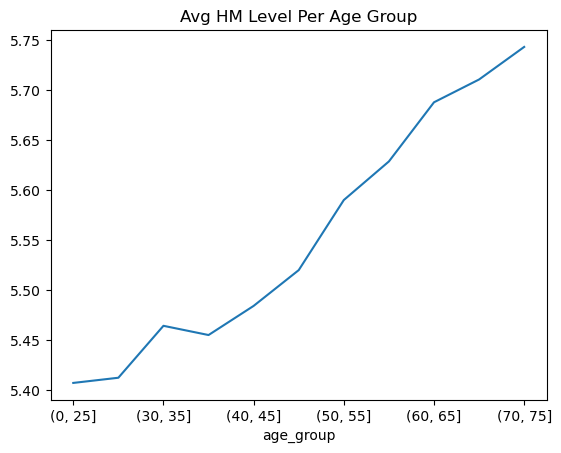

In [72]:
age_group_bins = [0] + list(range(25, 80, 5))
X_train['age_group'] = pd.cut(X_train['age'], bins=age_group_bins)
avg_hm_per_age_group = X_train.groupby('age_group')[hm_level_key].mean()
avg_hm_per_age_group.plot.line(title='Avg HM Level Per Age Group')

<Axes: title={'center': 'STD of HM Level Per Age Group'}, xlabel='age_group'>

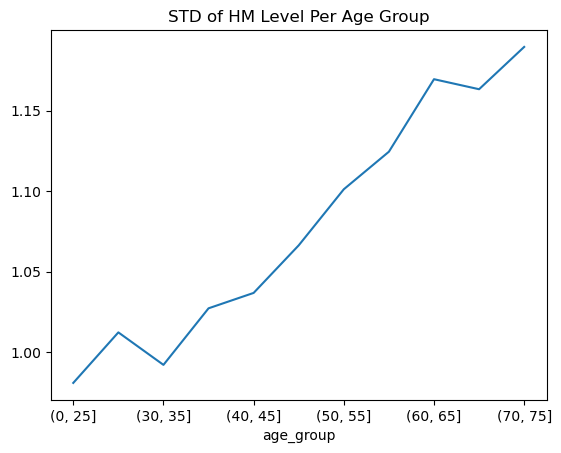

In [73]:
std_hm_per_age_group = X_train.groupby('age_group')[hm_level_key].std()
std_hm_per_age_group.plot.line(title="STD of HM Level Per Age Group")


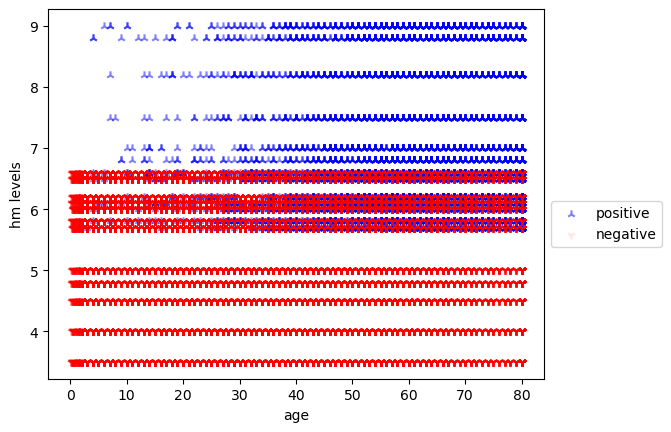

In [74]:
plt.scatter(x=train_positive['age'], y=train_positive[hm_level_key], c='blue', alpha=0.5, marker='2', label='positive')
plt.scatter(x=train_negative['age'], y=train_negative[hm_level_key], c='red', alpha=0.1, marker='1', label='negative')
plt.xlabel('age')
plt.ylabel('hm levels')
plt.legend(bbox_to_anchor=(1, 0.5))

<Axes: title={'center': 'BMI Index Histogram'}, ylabel='Frequency'>

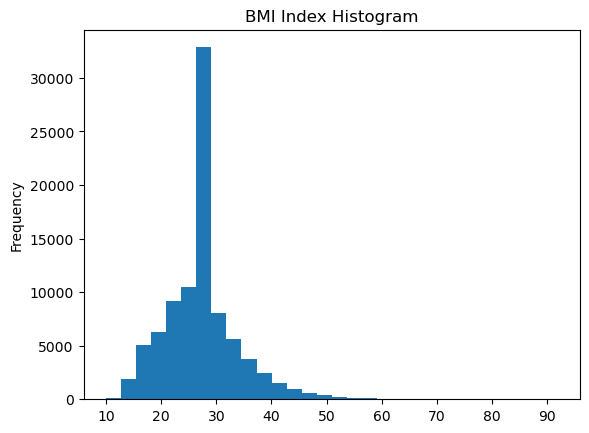

In [75]:
train['bmi'].plot.hist(bins=30, title="BMI Index Histogram")

Text(0.5, 1.0, 'BMI Index Histogram By Class')

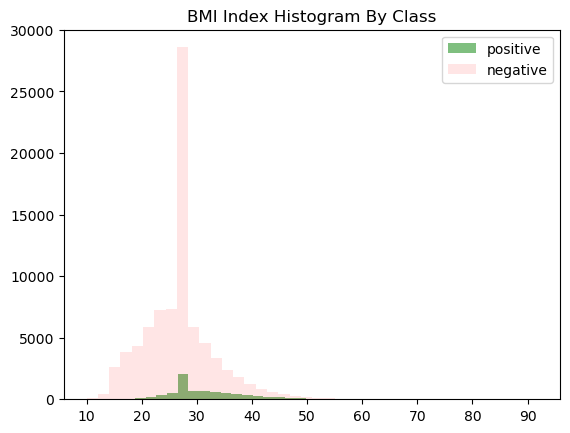

In [76]:
plt.hist(train_positive['bmi'], bins=40, color='green', alpha=0.5, label='positive')
plt.hist(train_negative['bmi'], bins=40, color='red', alpha=0.1, label='negative')
plt.legend()
plt.title('BMI Index Histogram By Class')

In [77]:
train_positive['bmi'].describe()

count    7637.000000
mean       31.956039
std         7.564196
min        10.980000
25%        27.320000
50%        29.950000
75%        35.860000
max        88.720000
Name: bmi, dtype: float64

In [78]:
train_negative['bmi'].describe()

count    82363.000000
mean        26.891594
std          6.361105
min         10.010000
25%         23.250000
50%         27.320000
75%         28.890000
max         91.820000
Name: bmi, dtype: float64

<Axes: title={'center': 'Blood Glucose Level Histogram'}, ylabel='Frequency'>

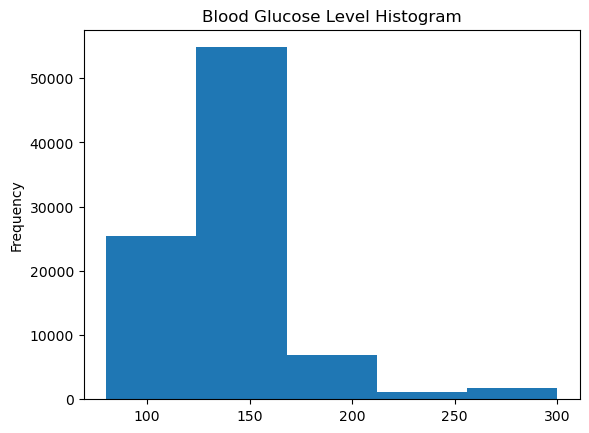

In [79]:
bld_glc_key = 'blood_glucose_level'
train[bld_glc_key].plot.hist(bins=5, title="Blood Glucose Level Histogram")

In [80]:
train[bld_glc_key].describe()

count    90000.000000
mean       138.044967
std         40.746560
min         80.000000
25%        100.000000
50%        140.000000
75%        159.000000
max        300.000000
Name: blood_glucose_level, dtype: float64

Text(0.5, 1.0, 'Blood Glucose Level Histogram By Class')

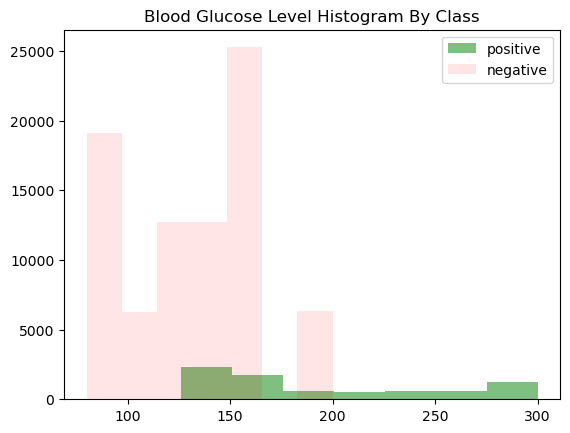

In [81]:
plt.hist(train_positive[bld_glc_key], bins=7, color='green', alpha=0.5, label='positive')
plt.hist(train_negative[bld_glc_key], bins=7, color='red', alpha=0.1, label='negative')
plt.legend()
plt.title('Blood Glucose Level Histogram By Class')

In [82]:
train['smoking_history'].unique()

array(['never', 'No Info', 'current', 'not current', 'former', 'ever'],
      dtype=object)

In [83]:
smoking_counts = train.groupby('diabetes')['smoking_history'].value_counts()
smoking_counts_percentages = train.groupby('diabetes')['smoking_history'].value_counts(normalize=True) * 100
smoking_counts_percentages.unstack()

smoking_history,No Info,current,ever,former,never,not current
diabetes,,,,,,
0,37.526559,9.069606,3.860957,8.547527,34.712189,6.283161
1,17.271180,11.156213,5.447165,18.829383,39.033652,8.262407


In [84]:
(train.groupby('smoking_history')['diabetes'].value_counts(normalize=True) * 100).unstack()

diabetes,0,1
smoking_history,,
No Info,95.907159,4.092841
current,89.762076,10.237924
ever,88.431591,11.568409
former,83.038452,16.961548
never,90.557790,9.442210
not current,89.131932,10.868068


In [85]:
(train.groupby('heart_disease')['diabetes'].value_counts(normalize=True) * 100).unstack()

diabetes,0,1
heart_disease,,
0,92.499769,7.500231
1,67.701342,32.298658


In [86]:
(train.groupby('hypertension')['diabetes'].value_counts(normalize=True) * 100).unstack()

diabetes,0,1
hypertension,,
0,93.087253,6.912747
1,72.110255,27.889745


In [87]:
(train.groupby('gender')['diabetes'].value_counts(normalize=True) * 100).unstack()

diabetes,0,1
gender,,
Female,92.386906,7.613094
Male,90.280864,9.719136
Other,100.000000,NaN


In [88]:
# check if X_train has age_group column
if('age_group' in X_train.columns):
    X_train.drop('age_group', axis=1, inplace=True)

selected_features = ['age', hm_level_key, bld_glc_key, 'hypertension', 'heart_disease', 'bmi']
features_to_drop = [feature for feature in X_train.columns if feature not in selected_features]
X_train = X_train.drop(features_to_drop, axis=1)
X_test = X_test.drop(features_to_drop, axis=1)

In [89]:
from sklearn.preprocessing import StandardScaler
age_scaler = StandardScaler()
X_train['age'] = age_scaler.fit_transform(X_train['age'].values.reshape(-1, 1))
X_test['age'] = age_scaler.transform(X_test['age'].values.reshape(-1, 1))

hm_scaler = StandardScaler()
X_train[hm_level_key] = hm_scaler.fit_transform(X_train[hm_level_key].values.reshape(-1, 1))
X_test[hm_level_key] = hm_scaler.transform(X_test[hm_level_key].values.reshape(-1, 1))

bld_glc_scaler = StandardScaler()
X_train[bld_glc_key] = bld_glc_scaler.fit_transform(X_train[bld_glc_key].values.reshape(-1, 1))
X_test[bld_glc_key] = bld_glc_scaler.transform(X_test[bld_glc_key].values.reshape(-1, 1))

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns

model = LogisticRegression(random_state=42, tol=1e-6, C=1e-2, max_iter=1000)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print(f"Mean Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.4f})")


Cross-Validation Scores: [0.95777778 0.96005556 0.96222222 0.9605     0.96022222]
Mean Accuracy: 0.96 (+/- 0.0028)


Text(50.722222222222214, 0.5, 'True Labels')

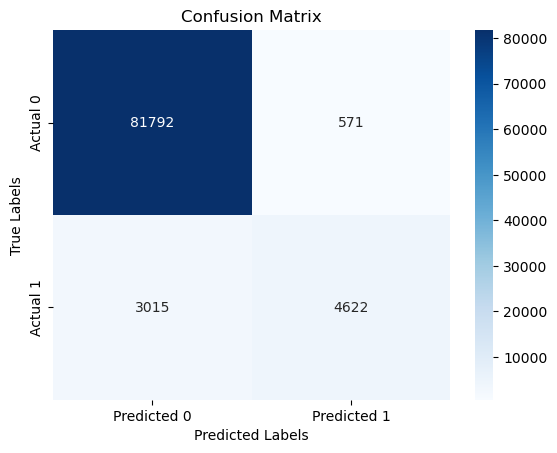

In [91]:
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

cm = confusion_matrix(y_train, y_train_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')